In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as pathces
import helper_functions as utils
import datasets.toy_example as dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_vectors_combined_n(U,n,num_vecs=2,ymin=None,ymax=None,title=None,figsize=None,savefig=False,save_filename=None):
    dict_ = {0:'A',1:'B',2:'C',3:'D'}
    colors = ['tab:blue','tab:orange','tab:green']
    markers = ['-','--']
    num_data = len(U)
    cmap = cm.get_cmap(name='rainbow')
    color_vec = cmap(np.arange(256))
    figsize = (12,10) if figsize is None else figsize
    fig,ax = plt.subplots(1,num_data,figsize = figsize)
    for i in range(num_vecs): 
        V,y_i,l_i = [],[],[]
        for j in range(num_data):
            Vcur = U[j][i,:]
            ax[j].plot(Vcur,markers[i],label="$(V_{})_{}$".format(dict_[j],i+1),color=colors[j],alpha=1-0.4*i)
            y_i_cur = np.min(Vcur)
            l_i_cur = np.max(Vcur)-np.min(Vcur)
            y_i.append(y_i_cur)
            l_i.append(l_i_cur)
    if ymin is not None and ymax is not None:
        ax[0].set_ylim([ymin,ymax])
        ax[1].set_ylim([ymin,ymax])
        l_i = [ymax-ymin for j in range(num_data)]
        y_i = [ymin for j in range(num_data)]
        
    for n_idx,j in enumerate(n):
        x_j = np.sum(n[:n_idx]) if n_idx else 0
        p_d = n[n_idx]
        for k in range(num_data):
            rect_cur_j = pathces.Rectangle((x_j,y_i[k]), p_d, l_i[k], color=color_vec[(250//len(n))*n_idx],alpha = 0.1)
            ax[k].add_patch(rect_cur_j)
    plt.suptitle(title,fontsize=20)   
    for i in range(num_data):
        ax[i].legend(fontsize=22,loc = 'lower left',handlelength=0.8,fancybox=True, framealpha=0.1)
        ax[i].tick_params(labelsize=28)
        ax[i].set_xticks([0,200])
        ax[i].set_ylim([-0.38,0.3])
        if i:
            ax[i].set_yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0)
    if savefig:
        plt.savefig(save_filename)
    

In [3]:
m = 10000
n_A = [100,25,25,25,25,25,25,25,25,25,25,25,25]
type_A = [0,2,2,2,2,0,0,0,0,2,2,0,0]
cov_A = None
n_B = [100,25,25,25,25,25,25,25,25,25,25,25,25]
type_B = [0,1,1,0,0,2,2,2,2,0,0,0,0]
n_C = [100,25,25,25,25,25,25,25,25,25,25,25,25]
type_C = [0,11,11,11,11,0,0,12,12,0,0,2,2]
p = np.sum(n_A)
n = [100,25,25,25,25,25,25,25,25,25,25,25,25]

pos_corr = True
seed1,seed2,seed3 = 13,21,12

mul_fac = 0.005
X_A,cov_A = dataset.generate_simulated_data_cases(n_A,type_A,m,cov=cov_A,pos_corr=pos_corr,seed=seed1,mul_fac=mul_fac)
X_B,cov_B = dataset.generate_simulated_data_cases(n_B,type_B,m,cov=cov_A,pos_corr=pos_corr,seed=seed2,mul_fac=mul_fac)
X_C,cov_C = dataset.generate_simulated_data_cases(n_C,type_C,m,cov=cov_A,cov2=cov_B,pos_corr=pos_corr,seed=seed3,mul_fac=mul_fac)


k = 30
d = 20
results = utils.compute_diff_vectors_n([X_A.T,X_B.T,X_C.T],k,d)

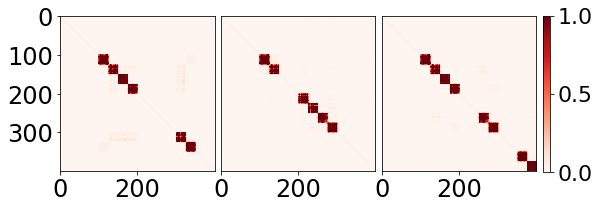

In [4]:
temp1 = (X_A-np.mean(X_A,axis=-1,keepdims=True))@(X_A-np.mean(X_A,axis=-1,keepdims=True)).T
temp2 = (X_B-np.mean(X_B,axis=-1,keepdims=True))@(X_B-np.mean(X_B,axis=-1,keepdims=True)).T
temp3 = (X_C-np.mean(X_C,axis=-1,keepdims=True))@(X_C-np.mean(X_C,axis=-1,keepdims=True)).T
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(9.8,3.1)) # Notice the equal aspect ratio
ax = [fig.add_subplot(1,3,i+1) for i in range(3)]

for i,a in enumerate(ax):
    a.tick_params(labelsize=24)
    a.set_aspect('equal')
    if i:
        a.set_yticks([])
    else:
        a.set_yticks([0,100,200,300])


num_samples = 300
ax[0].imshow(temp1,cmap=plt.get_cmap("Reds"),vmin=0,vmax=1)
ax[1].imshow(temp2,cmap=plt.get_cmap("Reds"),vmin=0,vmax=1)
im = ax[2].imshow(temp3,cmap=plt.get_cmap("Reds"),vmin=0,vmax=1)

fig.subplots_adjust(right=0.8)
fig.subplots_adjust(wspace=0.04, hspace=0)

cbar_ax = fig.add_axes([0.81, 0.15, 0.01, 0.7])
cb = fig.colorbar(im,ax=ax[2],fraction=0.05, pad=0.02,cax=cbar_ax,ticks=[0,0.5,1]) #,ticks=[-vmax2,0,vmax2]
cb.ax.tick_params(labelsize=22)        


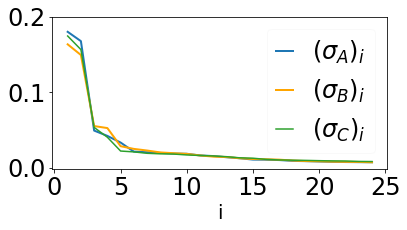

In [5]:
num_sig = 25
plt.figure(figsize=(6,2.8))
im = plt.plot(range(1,num_sig),results["lam_diff"][0][1:num_sig],label='$(\sigma_A)_{i}$',linewidth=2)
plt.plot(range(1,num_sig),results["lam_diff"][1][1:num_sig],label='$(\sigma_B)_{i}$',linewidth=2,color='orange')
plt.plot(range(1,num_sig),results["lam_diff"][2][1:num_sig],label='$(\sigma_C)_{i}$',color='tab:green')
plt.xlabel("i",fontsize=20)
plt.legend(fontsize=24,handlelength=0.7,fancybox=True, framealpha=0.1)
plt.xticks(fontsize=24)
plt.yticks([0,0.1,0.2],fontsize=24)
plt.show()

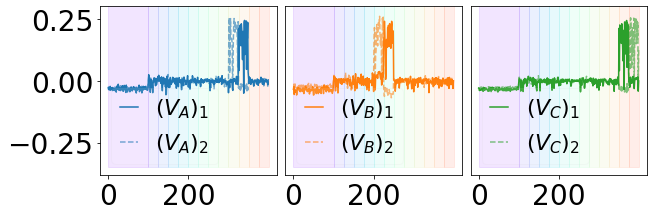

In [6]:
savefig = False
save_filename = ""
plot_vectors_combined_n([results["V_diff"][0][1:],results["V_diff"][1][1:],results["V_diff"][2][1:]],n,num_vecs=2,
                            ymin=-0.35,ymax=0.35,title="",
                            figsize=(9.8,3.1),savefig=savefig,save_filename=save_filename)


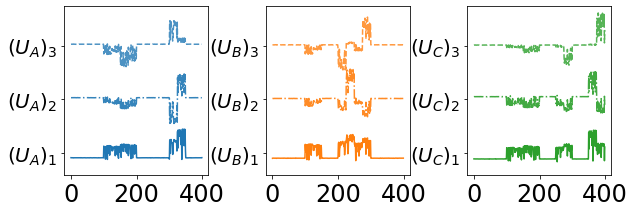

In [7]:
num_vecs = 3
marker = ['-','-.','--']
factor = 0.37
plt.figure(figsize=(9.8,3.1))
plt.subplot(1,3,1)
for i in range(num_vecs):
    plt.plot(results["V"][0][:,i]+i*factor,marker[i],color="tab:blue",alpha=1-0.1*i)
ticks = [i*factor for i in range(num_vecs)]
idx = np.arange(num_vecs)+1
plt.yticks(ticks,labels=["$(U_A)_{}$".format(i) for i in idx],fontsize=20)
plt.xticks([0,200,400],fontsize=24)
plt.ylim([-0.15,1.01])
plt.subplot(1,3,2)
for i in range(3):
    plt.plot(results["V"][1][:,i]+i*factor,marker[i],color="tab:orange",alpha=1-0.1*i)    
ticks = [i*factor for i in range(num_vecs)]
idx = np.arange(num_vecs)+1
plt.yticks(ticks,labels=["$(U_B)_{}$".format(i) for i in idx],fontsize=20)
plt.xticks([0,200,400],fontsize=24)
plt.ylim([-0.15,1.01])
plt.subplot(1,3,3)
for i in range(3):
    plt.plot(results["V"][2][:,i]+i*factor,marker[i],color="tab:green",alpha=1-0.1*i)    
ticks = [i*factor for i in range(num_vecs)]
idx = np.arange(num_vecs)+1
plt.yticks(ticks,labels=["$(U_C)_{}$".format(i) for i in idx],fontsize=20)
plt.xticks([0,200,400],fontsize=24)
plt.ylim([-0.15,1.01])
plt.subplots_adjust(wspace=0.4, hspace=0)